<a href="https://colab.research.google.com/github/hrking275/coursera__IBM/blob/main/Week4_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-05-16 14:04:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  4.29MB/s    in 5.7s    

2024-05-16 14:04:36 (6.11 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [3]:
import pandas as pd

In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [6]:
QUERY = """
SELECT ConvertedComp,COUNT(*) as count
FROM master
group by ConvertedComp
order by ConvertedComp
"""
pd.read_sql_query(QUERY,conn)

,ConvertedComp,count
0,NaN,816
1,0.0,26
2,4.0,1
3,5.0,1
4,10.0,2
...,...,...
3511,1848000.0,2
3512,1850000.0,1
3513,1860000.0,1
3514,1980000.0,1


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [10]:
QUERY = """
SELECT name
FROM pragma_table_info('master')
WHERE name = 'ConvertedComp'
"""
df = pd.read_sql_query(QUERY, conn)

# Check if the DataFrame is empty
if df.empty:
    print("The column 'ConvertedComp' does not exist in the table 'master'")

In [11]:
QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

Text(0.5, 1.0, 'Histogram of ConvertedComp Field')

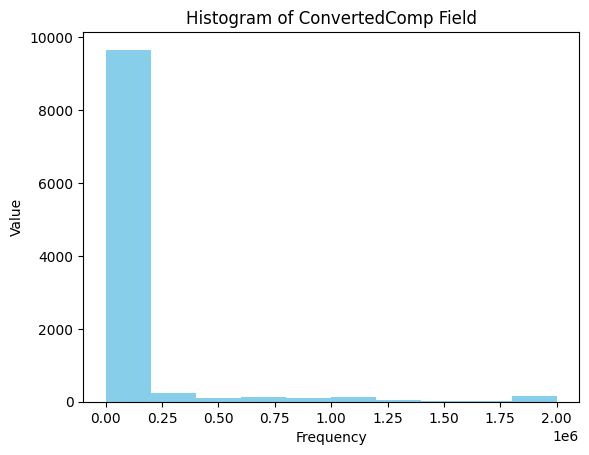

In [16]:
import matplotlib.pyplot as plt
QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

plt.hist(df['ConvertedComp'], bins=10, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.title('Histogram of ConvertedComp Field')

Text(0.5, 1.0, 'Box Plot of Age Field')

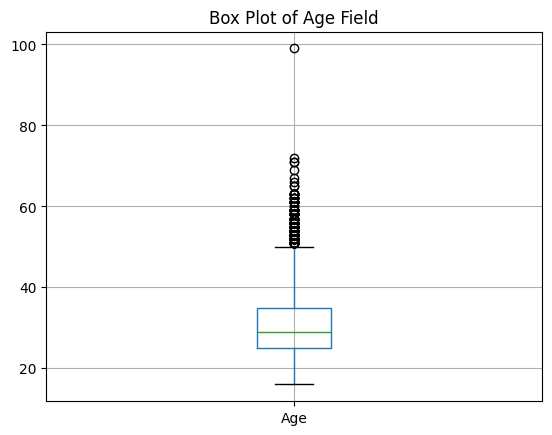

In [15]:
QUERY = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY, conn)
df.boxplot(['Age'])
plt.title('Box Plot of Age Field')

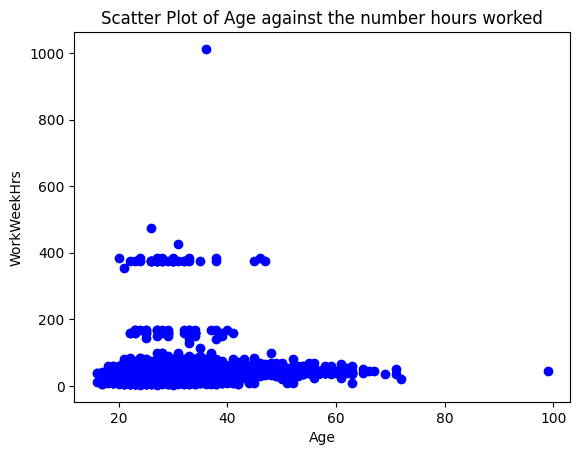

In [14]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERY, conn)
plt.scatter(df['Age'], df['WorkWeekHrs'], color='blue', marker='o')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Scatter Plot of Age against the number hours worked')

# Display the plot
plt.show()

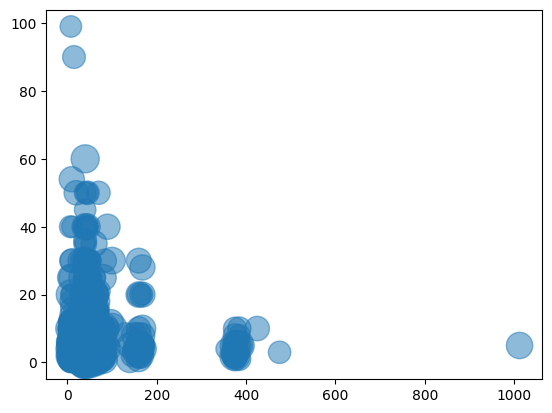

In [25]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df = pd.read_sql_query(QUERY, conn)
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=df['Age']*10, alpha=0.5)
plt.xlabel=('WorkWeekHrs')
plt.ylabel=('CodeRevHrs')
plt.title=('Bubble Plot of Work and Code Review Hours against Age')
plt.show()

TypeError: 'str' object is not callable

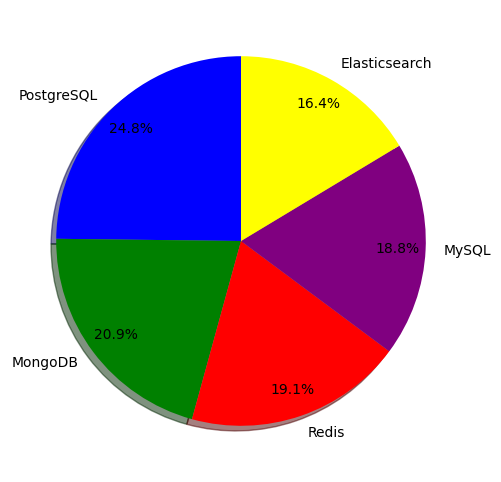

In [41]:
QUERY = """
SELECT DatabaseDesireNextYear, Count(*) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""
df2 = pd.read_sql_query(QUERY, conn)
df2.set_index('DatabaseDesireNextYear', inplace=True)
color_list = ['blue', 'green', 'red', 'purple', 'yellow']
labels = df2['Count'].index[:5]

# Create the pie chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.pie(df2['Count'], labels=labels, colors=color_list, autopct='%1.1f%%', startangle=90, shadow=True, pctdistance=0.85)
plt.title('Top 5 Databases Desired Next Year')  # Add the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(labels, loc='upper left')
plt.show()

TypeError: 'str' object is not callable

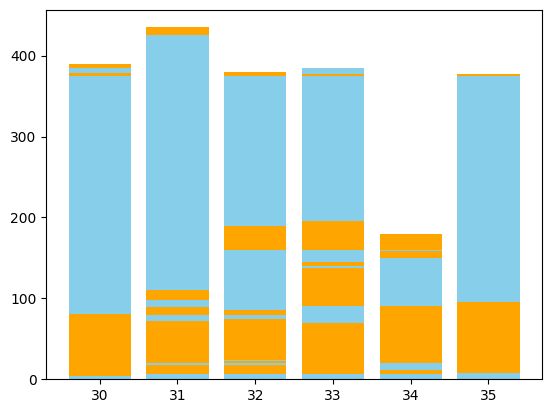

In [43]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age>=30 and Age<=35
Group by WorkWeekHrs, CodeRevHrs, Age
Order by Age
"""
df = pd.read_sql_query(QUERY, conn)
plt.bar(df['Age'], df['WorkWeekHrs'], color='skyblue', label='WorkWeekHrs')
plt.bar(df['Age'], df['CodeRevHrs'], bottom=df['WorkWeekHrs'], color='orange', label=df['CodeRevHrs'])
plt.xlabel('Age')
plt.ylabel('Work Week and Code Review Hours')
plt.title('Stacked Chart of Hours Worked by Age between 30 and 35')
plt.show()

TypeError: 'str' object is not callable

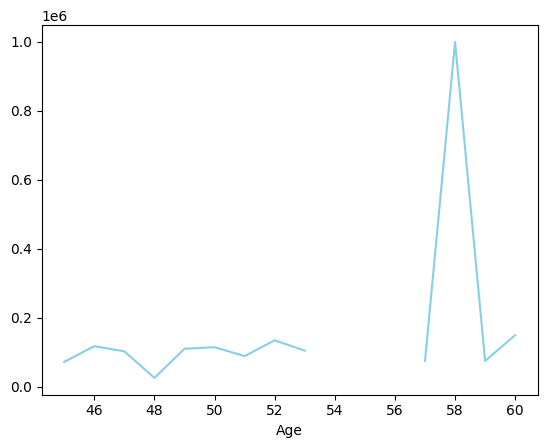

In [58]:
QUERY = """
SELECT ConvertedComp, Age
FROM master
Where Age >=45 and Age<=60
Group by Age
"""
df = pd.read_sql_query(QUERY, conn)
df3 = df.groupby(by='Age')['ConvertedComp'].median()
df3.plot(kind='line', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.title('Median Converted Compensation by Age')
plt.show()


In [53]:
print(df['ConvertedComp'].median())

107754.5


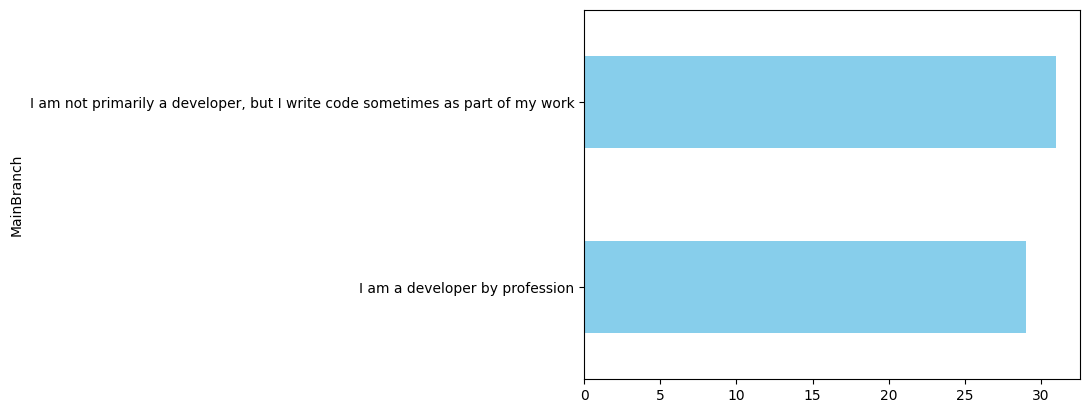

In [59]:
QUERY = """
SELECT MainBranch, Age
FROM master
"""
df = pd.read_sql_query(QUERY, conn)
df4 = df.groupby(by='MainBranch')['Age'].median()
df4.plot(kind='barh', color='skyblue')
plt.show()